In [1]:
import h5py
import tables_io
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Magnitude Shifting

## Read in Data and make quality cuts

In [2]:
buzzard_file = 'augmentation_paper_plots/catalogs/buzzard_catalog.hdf5'
buzzard_data = tables_io.read(buzzard_file)
buzzard_df = pd.DataFrame(buzzard_data['photometry'])
buzzard_df

,eg,egr,ei,eiz,er,eri,eu,eug,ey,ez,...,i,iz,r,ri,specz,u,ug,y,z,zy
0,0.011773,0.013997,0.004830,0.007974,0.007572,0.008981,0.054568,0.055823,0.011582,0.006345,...,21.769382,0.283893,22.624446,0.855064,0.675341,24.265597,0.727343,21.265647,21.485489,0.219841
1,0.056221,0.068207,0.043668,0.073935,0.038617,0.058294,0.272251,0.277995,0.133076,0.059661,...,24.159882,0.241199,24.393432,0.233550,0.353149,30.000000,4.764188,23.916484,23.918682,0.002198
2,0.037506,0.052931,0.028096,0.043802,0.037349,0.046737,0.110666,0.116849,0.065846,0.033604,...,23.681077,0.385646,24.357185,0.676108,0.912532,25.033294,0.236986,23.152559,23.295431,0.142872
3,0.002951,0.003132,0.000719,0.001130,0.001050,0.001273,0.051192,0.051277,0.001616,0.000872,...,19.701627,0.371242,20.479865,0.778238,0.459211,24.196266,2.160286,19.127597,19.330385,0.202788
4,0.090042,0.107925,0.065402,0.113306,0.059500,0.088417,0.422132,0.431628,0.181630,0.092525,...,24.598452,0.203357,24.862776,0.264324,0.432662,30.000000,4.252830,24.254201,24.395095,0.140894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10817977,0.102825,0.128249,0.052473,0.090892,0.076648,0.092889,0.419141,0.431570,0.147030,0.074215,...,24.359327,0.203648,25.137735,0.778407,0.732042,30.000000,4.108701,24.024746,24.155680,0.130934
10817978,0.245565,0.297065,0.128200,0.225598,0.167169,0.210667,0.750545,0.789696,0.351653,0.185632,...,25.329204,0.178121,25.984367,0.655163,0.624942,30.000000,3.163528,30.000000,25.151082,-4.848918
10817979,0.016259,0.019299,0.011495,0.020523,0.010397,0.015499,0.070370,0.072224,0.030955,0.017002,...,22.710728,0.155027,22.968764,0.258036,0.428085,24.541729,0.652951,22.333070,22.555701,0.222631
10817980,0.043289,0.053356,0.034710,0.058576,0.031192,0.046666,0.211571,0.215954,0.102710,0.047184,...,23.910620,0.246676,24.161574,0.250954,0.324251,25.736895,0.784899,23.635266,23.663944,0.028678


In [3]:
mask = (buzzard_df['u'] < 30) & (buzzard_df['g'] < 30) & (buzzard_df['r'] < 30) & (buzzard_df['i'] < 30) & (buzzard_df['z'] < 30) & (buzzard_df['y'] < 30)
buzzard_df = buzzard_df[mask]
buzzard_df

,eg,egr,ei,eiz,er,eri,eu,eug,ey,ez,...,i,iz,r,ri,specz,u,ug,y,z,zy
0,0.011773,0.013997,0.004830,0.007974,0.007572,0.008981,0.054568,0.055823,0.011582,0.006345,...,21.769382,0.283893,22.624446,0.855064,0.675341,24.265597,0.727343,21.265647,21.485489,0.219841
2,0.037506,0.052931,0.028096,0.043802,0.037349,0.046737,0.110666,0.116849,0.065846,0.033604,...,23.681077,0.385646,24.357185,0.676108,0.912532,25.033294,0.236986,23.152559,23.295431,0.142872
3,0.002951,0.003132,0.000719,0.001130,0.001050,0.001273,0.051192,0.051277,0.001616,0.000872,...,19.701627,0.371242,20.479865,0.778238,0.459211,24.196266,2.160286,19.127597,19.330385,0.202788
7,0.007353,0.009330,0.004210,0.007083,0.005743,0.007120,0.025386,0.026429,0.010443,0.005697,...,21.620120,0.251599,22.324242,0.704121,0.624410,23.434728,0.407442,21.153258,21.368522,0.215264
10,0.004829,0.005557,0.002478,0.004227,0.002749,0.003701,0.025440,0.025895,0.006342,0.003425,...,21.044772,0.228665,21.524322,0.479550,0.504495,23.437059,0.866340,20.611870,20.816107,0.204238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10817970,0.023925,0.027308,0.012816,0.021688,0.013164,0.018372,0.125893,0.128146,0.030799,0.017496,...,22.828847,0.242030,23.224967,0.396120,0.433763,25.173256,0.865052,22.327583,22.586817,0.259234
10817971,0.002238,0.002862,0.001789,0.003108,0.001784,0.002526,0.018811,0.018944,0.005046,0.002541,...,20.690991,0.198967,21.054956,0.363965,0.118358,23.109282,1.373582,20.363599,20.492024,0.128425
10817974,0.019542,0.026671,0.011932,0.017901,0.018151,0.021722,0.050052,0.053731,0.026456,0.013344,...,22.751227,0.458543,23.573742,0.822515,0.837266,24.171808,0.083344,22.162548,22.292684,0.130136
10817979,0.016259,0.019299,0.011495,0.020523,0.010397,0.015499,0.070370,0.072224,0.030955,0.017002,...,22.710728,0.155027,22.968764,0.258036,0.428085,24.541729,0.652951,22.333070,22.555701,0.222631


In [4]:
dc2_file = 'augmentation_paper_plots/catalogs/fzboost_application_catalog.hdf5'
dc2_data = tables_io.read(dc2_file)
dc2_df = pd.DataFrame(dc2_data['photometry'])
dc2_df

,eg,egr,ei,eiz,er,eri,eu,eug,ey,ez,...,iz,r,ri,size,specz,u,ug,y,z,zy
0,0.265709,0.294343,0.065172,0.221899,0.126635,0.142422,0.596857,0.653329,0.296248,0.212113,...,0.400972,24.05779,0.726830,1.37057,0.589002,25.02543,-0.402275,22.99856,22.92999,-0.068571
1,0.076845,0.095560,0.026741,0.051276,0.056803,0.062783,0.256366,0.267635,0.071431,0.043750,...,0.686113,22.93367,0.846581,2.12694,0.999547,23.74729,0.175136,21.22587,21.40098,0.175107
2,0.180536,0.187415,0.046138,0.106715,0.050309,0.068263,2.177670,2.185140,0.126338,0.096225,...,0.388178,23.32877,0.704033,1.34182,0.387335,26.68006,1.779700,22.12131,22.23655,0.115246
3,0.331025,0.431263,0.151683,0.344966,0.276424,0.315306,8.473580,8.480050,1.084460,0.309829,...,0.430022,24.62058,0.621974,3.19779,1.715034,27.38192,2.240830,24.05406,23.56858,-0.485481
4,0.289616,0.399928,0.059403,0.208866,0.275799,0.282123,0.269342,0.395503,0.411137,0.200241,...,0.074200,24.65532,1.200760,1.38811,0.824784,24.74905,-0.494577,23.32166,23.38036,0.058706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520453,0.028926,0.042626,0.064517,0.177220,0.031310,0.071713,0.102205,0.106220,0.717934,0.165060,...,-0.104704,24.20727,-0.149967,1.84581,2.290370,24.72785,0.382242,25.36828,24.46194,-0.906345
5520454,0.140034,0.172357,0.119872,0.334889,0.100486,0.156418,0.497563,0.516893,0.591785,0.312700,...,-0.044257,25.88642,0.414821,1.09283,0.640610,26.64029,0.230445,25.32067,25.51585,0.195186
5520455,0.048102,0.072631,0.089373,0.163732,0.054419,0.104637,0.121744,0.130903,0.461739,0.137188,...,0.478558,25.26098,0.120627,1.04954,1.371529,25.13690,-0.190757,25.04124,24.66180,-0.379440
5520456,0.032535,0.045226,0.044211,0.080984,0.031415,0.054236,0.079361,0.085771,0.128423,0.067851,...,0.544235,24.50432,0.249666,1.48199,1.063150,24.51700,-0.220228,23.49994,23.71041,0.210471


## Do Shifting

### i band

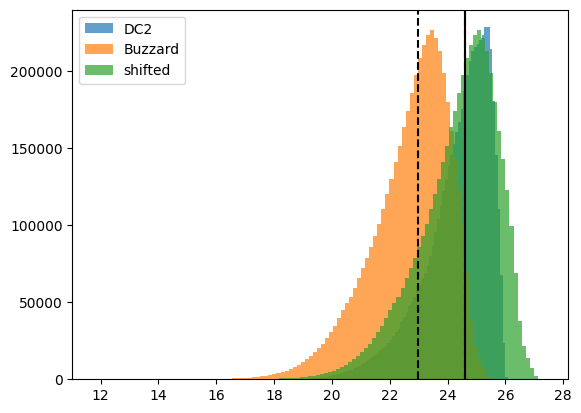

In [7]:
buz_i = buzzard_df['i'].to_numpy()
dc2_i = dc2_df['i'].to_numpy()

buz_med = np.median(buz_i)
dc2_med = np.median(dc2_i)
med_diff = dc2_med - buz_med
new_i = buz_i+med_diff
new_med = np.median(new_i)

plt.hist(dc2_i, bins=100, alpha=0.7, label='DC2')
plt.hist(buz_i, bins=100, alpha=0.7, label='Buzzard')
plt.hist(new_i, bins=100, alpha=0.7, label='shifted')
plt.axvline(x=dc2_med, color='k')
plt.axvline(x=buz_med, color='k', linestyle='--')
plt.axvline(x=new_med, color='k', linestyle='--')
plt.legend()
plt.savefig('augmentation_paper_plots/i_band_shifting.png', facecolor='white', bbox_inches='tight')
plt.show()

In [6]:
dc2_med - buz_med

1.6394964258665894

### g band

1.2208291748304525


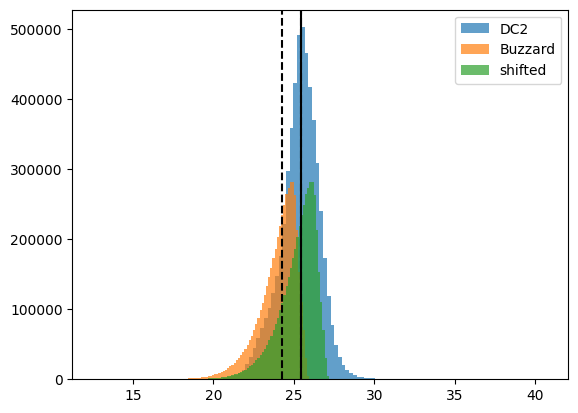

In [8]:
buz_g = buzzard_df['g'].to_numpy()
dc2_g = dc2_df['g'].to_numpy()

buz_med = np.median(buz_g)
dc2_med = np.median(dc2_g)
med_diff = dc2_med - buz_med
new_g = buz_g+med_diff
new_med = np.median(new_g)

print(dc2_med - buz_med)

plt.hist(dc2_g, bins=100, alpha=0.7, label='DC2')
plt.hist(buz_g, bins=100, alpha=0.7, label='Buzzard')
plt.hist(new_g, bins=100, alpha=0.7, label='shifted')
plt.axvline(x=dc2_med, color='k')
plt.axvline(x=buz_med, color='k', linestyle='--')
plt.axvline(x=new_med, color='k', linestyle='--')
plt.legend()
plt.show()

### u band

0.8330852530339428


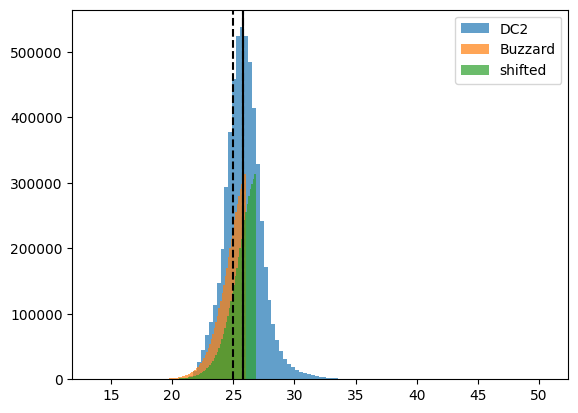

In [9]:
buz_u = buzzard_df['u'].to_numpy()
dc2_u = dc2_df['u'].to_numpy()

buz_med = np.median(buz_u)
dc2_med = np.median(dc2_u)
med_diff = dc2_med - buz_med
new_u = buz_u+med_diff
new_med = np.median(new_u)
print(dc2_med - buz_med)

plt.hist(dc2_u, bins=100, alpha=0.7, label='DC2')
plt.hist(buz_u, bins=100, alpha=0.7, label='Buzzard')
plt.hist(new_u, bins=100, alpha=0.7, label='shifted')
plt.axvline(x=dc2_med, color='k')
plt.axvline(x=buz_med, color='k', linestyle='--')
plt.axvline(x=new_med, color='k', linestyle='--')
plt.legend()
plt.show()

### r band

1.6031151445217553


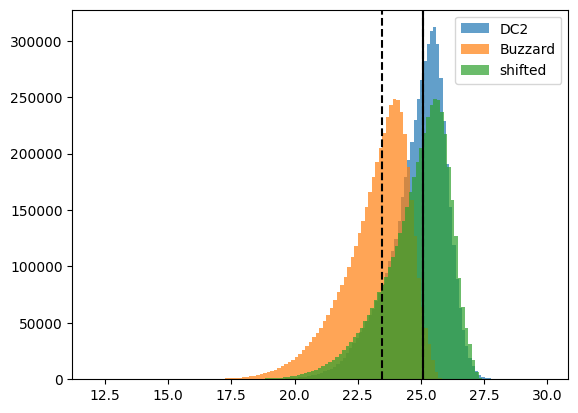

In [10]:
buz_r = buzzard_df['r'].to_numpy()
dc2_r = dc2_df['r'].to_numpy()

buz_med = np.median(buz_r)
dc2_med = np.median(dc2_r)
med_diff = dc2_med - buz_med
new_r = buz_r+med_diff
new_med = np.median(new_r)
print(dc2_med - buz_med)

plt.hist(dc2_r, bins=100, alpha=0.7, label='DC2')
plt.hist(buz_r, bins=100, alpha=0.7, label='Buzzard')
plt.hist(new_r, bins=100, alpha=0.7, label='shifted')
plt.axvline(x=dc2_med, color='k')
plt.axvline(x=buz_med, color='k', linestyle='--')
plt.axvline(x=new_med, color='k', linestyle='--')
plt.legend()
plt.show()

### z band

1.5814195231827597


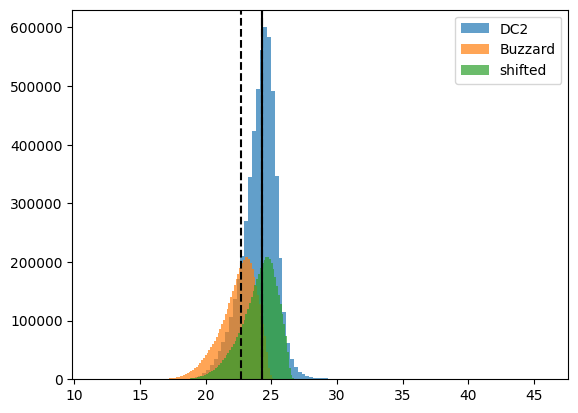

In [11]:
buz_z = buzzard_df['z'].to_numpy()
dc2_z = dc2_df['z'].to_numpy()

buz_med = np.median(buz_z)
dc2_med = np.median(dc2_z)
med_diff = dc2_med - buz_med
new_z = buz_z+med_diff
new_med = np.median(new_z)
print(dc2_med - buz_med)

plt.hist(dc2_z, bins=100, alpha=0.7, label='DC2')
plt.hist(buz_z, bins=100, alpha=0.7, label='Buzzard')
plt.hist(new_z, bins=100, alpha=0.7, label='shifted')
plt.axvline(x=dc2_med, color='k')
plt.axvline(x=buz_med, color='k', linestyle='--')
plt.axvline(x=new_med, color='k', linestyle='--')
plt.legend()
plt.show()

### y band

1.4965170652658877


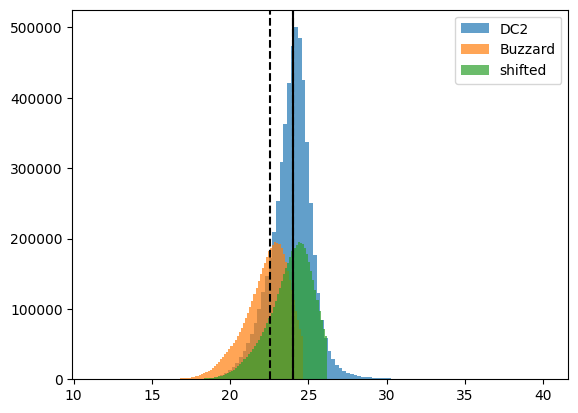

In [12]:
buz_y = buzzard_df['y'].to_numpy()
dc2_y = dc2_df['y'].to_numpy()

buz_med = np.median(buz_y)
dc2_med = np.median(dc2_y)
med_diff = dc2_med - buz_med
new_y = buz_y+med_diff
new_med = np.median(new_y)
print(dc2_med - buz_med)

plt.hist(dc2_y, bins=100, alpha=0.7, label='DC2')
plt.hist(buz_y, bins=100, alpha=0.7, label='Buzzard')
plt.hist(new_y, bins=100, alpha=0.7, label='shifted')
plt.axvline(x=dc2_med, color='k')
plt.axvline(x=buz_med, color='k', linestyle='--')
plt.axvline(x=new_med, color='k', linestyle='--')
plt.legend()
plt.show()

# Make new catalog

In [21]:
buzzard_shifted = {}
buz_shifted = pd.DataFrame.from_dict(buzzard_shifted)

buz_shifted['u'] = new_u
buz_shifted['g'] = new_g
buz_shifted['r'] = new_r
buz_shifted['i'] = new_i
buz_shifted['z'] = new_z
buz_shifted['y'] = new_y
buz_shifted

,u,g,r,i,z,y
0,25.098682,24.759084,24.227561,23.408878,23.066908,22.762164
1,25.866379,26.017137,25.960300,25.320573,24.876851,24.649076
2,25.029352,23.256810,22.082980,21.341123,20.911805,20.624115
3,24.267813,24.248114,23.927357,23.259617,22.949941,22.649775
4,24.270144,23.791548,23.127437,22.684268,22.397527,22.108387
...,...,...,...,...,...,...
4735951,26.006341,25.529033,24.828082,24.468344,24.168236,23.824100
4735952,23.942367,22.956528,22.658071,22.330488,22.073443,21.860116
4735953,25.004893,25.309293,25.176857,24.390723,23.874103,23.659065
4735954,25.374814,25.109607,24.571879,24.350225,24.137121,23.829588


In [22]:
#calculate colors
bands = ['u', 'g', 'r', 'i', 'z', 'y']
for i in range(len(bands)-1):
    color = buz_shifted[bands[i]] - buz_shifted[bands[i+1]]
    name = f'{bands[i]}{bands[i+1]}'
    buz_shifted[name] = color

buz_shifted

,u,g,r,i,z,y,ug,gr,ri,iz,zy
0,25.098682,24.759084,24.227561,23.408878,23.066908,22.762164,0.339599,0.531523,0.818683,0.341970,0.304744
1,25.866379,26.017137,25.960300,25.320573,24.876851,24.649076,-0.150758,0.056837,0.639727,0.443722,0.227775
2,25.029352,23.256810,22.082980,21.341123,20.911805,20.624115,1.772542,1.173830,0.741856,0.429319,0.287690
3,24.267813,24.248114,23.927357,23.259617,22.949941,22.649775,0.019698,0.320758,0.667740,0.309675,0.300166
4,24.270144,23.791548,23.127437,22.684268,22.397527,22.108387,0.478597,0.664110,0.443169,0.286741,0.289140
...,...,...,...,...,...,...,...,...,...,...,...
4735951,26.006341,25.529033,24.828082,24.468344,24.168236,23.824100,0.477308,0.700951,0.359739,0.300107,0.344136
4735952,23.942367,22.956528,22.658071,22.330488,22.073443,21.860116,0.985838,0.298457,0.327584,0.257044,0.213327
4735953,25.004893,25.309293,25.176857,24.390723,23.874103,23.659065,-0.304400,0.132435,0.786134,0.516620,0.215038
4735954,25.374814,25.109607,24.571879,24.350225,24.137121,23.829588,0.265207,0.537728,0.221654,0.213104,0.307533


In [23]:
#grab uncertainties and redshift
bands = ['u', 'g', 'r', 'i', 'z', 'y']
colors = ['ug', 'gr', 'ri', 'iz', 'zy']

for band in bands:
    buz_shifted[f'e{band}'] = buzzard_df[f'e{band}'].to_numpy()

for color in colors:
    buz_shifted[f'e{color}'] = buzzard_df[f'e{color}'].to_numpy()

buz_shifted['specz'] = buzzard_df['specz'].to_numpy()

In [24]:
buz_shifted

,u,g,r,i,z,y,ug,gr,ri,iz,...,er,ei,ez,ey,eug,egr,eri,eiz,ezy,specz
0,25.098682,24.759084,24.227561,23.408878,23.066908,22.762164,0.339599,0.531523,0.818683,0.341970,...,0.007572,0.004830,0.006345,0.011582,0.055823,0.013997,0.008981,0.007974,0.013206,0.675341
1,25.866379,26.017137,25.960300,25.320573,24.876851,24.649076,-0.150758,0.056837,0.639727,0.443722,...,0.037349,0.028096,0.033604,0.065846,0.116849,0.052931,0.046737,0.043802,0.073925,0.912532
2,25.029352,23.256810,22.082980,21.341123,20.911805,20.624115,1.772542,1.173830,0.741856,0.429319,...,0.001050,0.000719,0.000872,0.001616,0.051277,0.003132,0.001273,0.001130,0.001836,0.459211
3,24.267813,24.248114,23.927357,23.259617,22.949941,22.649775,0.019698,0.320758,0.667740,0.309675,...,0.005743,0.004210,0.005697,0.010443,0.026429,0.009330,0.007120,0.007083,0.011895,0.624410
4,24.270144,23.791548,23.127437,22.684268,22.397527,22.108387,0.478597,0.664110,0.443169,0.286741,...,0.002749,0.002478,0.003425,0.006342,0.025895,0.005557,0.003701,0.004227,0.007208,0.504495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4735951,26.006341,25.529033,24.828082,24.468344,24.168236,23.824100,0.477308,0.700951,0.359739,0.300107,...,0.013164,0.012816,0.017496,0.030799,0.128146,0.027308,0.018372,0.021688,0.035422,0.433763
4735952,23.942367,22.956528,22.658071,22.330488,22.073443,21.860116,0.985838,0.298457,0.327584,0.257044,...,0.001784,0.001789,0.002541,0.005046,0.018944,0.002862,0.002526,0.003108,0.005650,0.118358
4735953,25.004893,25.309293,25.176857,24.390723,23.874103,23.659065,-0.304400,0.132435,0.786134,0.516620,...,0.018151,0.011932,0.013344,0.026456,0.053731,0.026671,0.021722,0.017901,0.029631,0.837266
4735954,25.374814,25.109607,24.571879,24.350225,24.137121,23.829588,0.265207,0.537728,0.221654,0.213104,...,0.010397,0.011495,0.017002,0.030955,0.072224,0.019299,0.015499,0.020523,0.035317,0.428085


<Figure size 640x480 with 0 Axes>

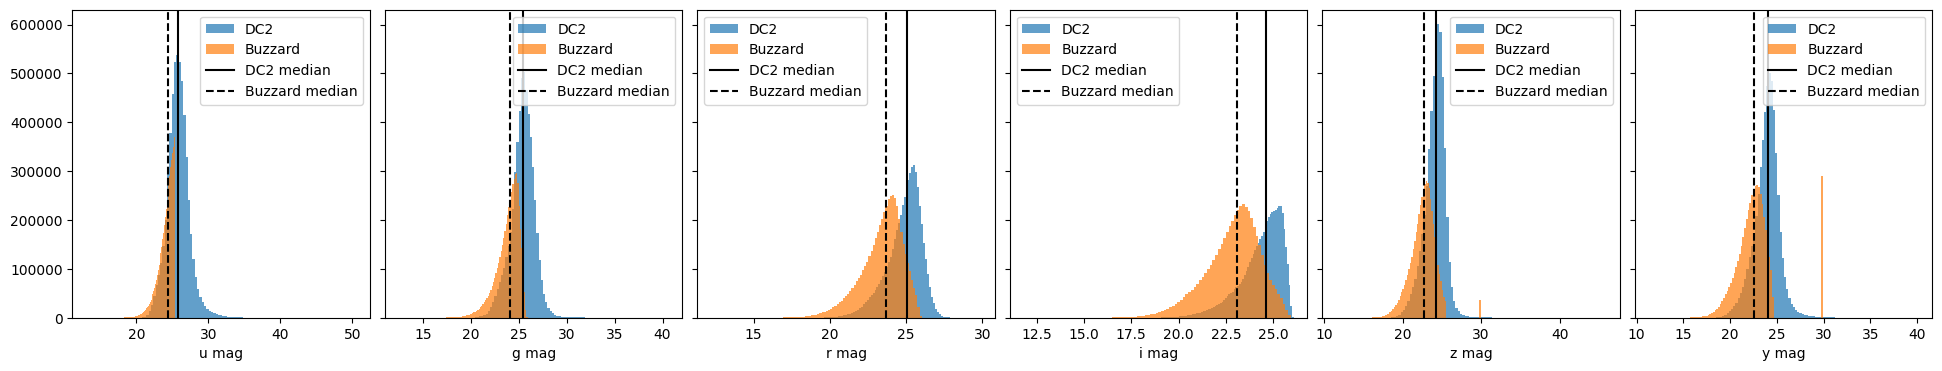

In [8]:
bands = ['u', 'g', 'r', 'i', 'z', 'y']

plt.figure()
fig, ax = plt.subplots(1, 6, sharey=True, figsize=(24,4))

for i in range(len(bands)):
    band_name = bands[i]
    band_dc2 = dc2_df[band_name].to_numpy()
    dc2_med = np.median(band_dc2)
    band_buz = buzzard_df[band_name].to_numpy()
    buz_med = np.median(band_buz)

    ax[i].hist(band_dc2, bins=100, alpha=0.7, label='DC2')
    ax[i].hist(band_buz, bins=100, alpha=0.7, label='Buzzard')
    ax[i].axvline(x=dc2_med, color='k', label='DC2 median')
    ax[i].axvline(x=buz_med, color='k', linestyle='--', label='Buzzard median')
    ax[i].set_xlabel(f'{bands[i]} mag')
    ax[i].legend()

fig.subplots_adjust(wspace=0.05)
plt.show()

<Figure size 640x480 with 0 Axes>

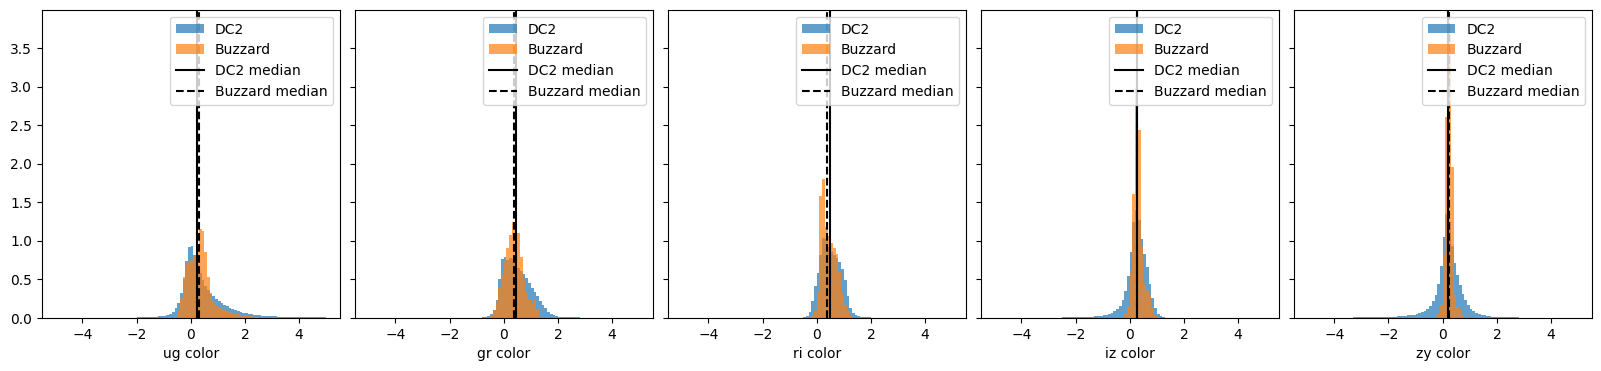

In [25]:
colors = ['ug', 'gr', 'ri', 'iz', 'zy']

plt.figure()
fig, ax = plt.subplots(1, 5, sharey=True, figsize=(20,4))

for i in range(len(colors)):
    color_name = colors[i]
    color_dc2 = dc2_df[color_name].to_numpy()
    dc2_med = np.median(color_dc2)
    color_buz = buz_shifted[color_name].to_numpy()
    buz_med = np.median(color_buz)

    ax[i].hist(color_dc2, bins=100, range=[-5,5], alpha=0.7, density=True, label='DC2')
    ax[i].hist(color_buz, bins=100, range=[-5,5], alpha=0.7, density=True, label='Buzzard')
    ax[i].axvline(x=dc2_med, color='k', label='DC2 median')
    ax[i].axvline(x=buz_med, color='k', linestyle='--', label='Buzzard median')
    ax[i].set_xlabel(f'{colors[i]} color')
    ax[i].legend()

fig.subplots_adjust(wspace=0.05)
plt.show()

# Save new shifted buzzard file

In [26]:
filename = 'augmentation_paper_plots/catalogs/buzzard_shifted_mags.hdf5'
outf = h5py.File(filename, 'w')
group = outf.create_group('photometry')

In [27]:
keys = list(buz_shifted.columns)
for key in keys:
    group[f'{key}'] = buz_shifted[f'{key}']
outf.close()

# NMAD Matching

## Read in data

In [2]:
buzzard_file = 'augmentation_paper_plots/catalogs/buzzard_shifted_mags.hdf5'
buzzard_data = tables_io.read(buzzard_file)
buzzard_df = pd.DataFrame(buzzard_data['photometry'])
buzzard_df

,eg,egr,ei,eiz,er,eri,eu,eug,ey,ez,...,i,iz,r,ri,specz,u,ug,y,z,zy
0,0.011773,0.013997,0.004830,0.007974,0.007572,0.008981,0.054568,0.055823,0.011582,0.006345,...,23.408878,0.341970,24.227561,0.818683,0.675341,25.098682,0.339599,22.762164,23.066908,0.304744
1,0.037506,0.052931,0.028096,0.043802,0.037349,0.046737,0.110666,0.116849,0.065846,0.033604,...,25.320573,0.443722,25.960300,0.639727,0.912532,25.866379,-0.150758,24.649076,24.876851,0.227775
2,0.002951,0.003132,0.000719,0.001130,0.001050,0.001273,0.051192,0.051277,0.001616,0.000872,...,21.341123,0.429319,22.082980,0.741856,0.459211,25.029352,1.772542,20.624115,20.911805,0.287690
3,0.007353,0.009330,0.004210,0.007083,0.005743,0.007120,0.025386,0.026429,0.010443,0.005697,...,23.259617,0.309675,23.927357,0.667740,0.624410,24.267813,0.019698,22.649775,22.949941,0.300166
4,0.004829,0.005557,0.002478,0.004227,0.002749,0.003701,0.025440,0.025895,0.006342,0.003425,...,22.684268,0.286741,23.127437,0.443169,0.504495,24.270144,0.478597,22.108387,22.397527,0.289140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4735951,0.023925,0.027308,0.012816,0.021688,0.013164,0.018372,0.125893,0.128146,0.030799,0.017496,...,24.468344,0.300107,24.828082,0.359739,0.433763,26.006341,0.477308,23.824100,24.168236,0.344136
4735952,0.002238,0.002862,0.001789,0.003108,0.001784,0.002526,0.018811,0.018944,0.005046,0.002541,...,22.330488,0.257044,22.658071,0.327584,0.118358,23.942367,0.985838,21.860116,22.073443,0.213327
4735953,0.019542,0.026671,0.011932,0.017901,0.018151,0.021722,0.050052,0.053731,0.026456,0.013344,...,24.390723,0.516620,25.176857,0.786134,0.837266,25.004893,-0.304400,23.659065,23.874103,0.215038
4735954,0.016259,0.019299,0.011495,0.020523,0.010397,0.015499,0.070370,0.072224,0.030955,0.017002,...,24.350225,0.213104,24.571879,0.221654,0.428085,25.374814,0.265207,23.829588,24.137121,0.307533


In [3]:
dc2_file = 'augmentation_paper_plots/catalogs/fzboost_application_catalog.hdf5'
dc2_data = tables_io.read(dc2_file)
dc2_df = pd.DataFrame(dc2_data['photometry'])
dc2_df

,eg,egr,ei,eiz,er,eri,eu,eug,ey,ez,...,iz,r,ri,size,specz,u,ug,y,z,zy
0,0.265709,0.294343,0.065172,0.221899,0.126635,0.142422,0.596857,0.653329,0.296248,0.212113,...,0.400972,24.05779,0.726830,1.37057,0.589002,25.02543,-0.402275,22.99856,22.92999,-0.068571
1,0.076845,0.095560,0.026741,0.051276,0.056803,0.062783,0.256366,0.267635,0.071431,0.043750,...,0.686113,22.93367,0.846581,2.12694,0.999547,23.74729,0.175136,21.22587,21.40098,0.175107
2,0.180536,0.187415,0.046138,0.106715,0.050309,0.068263,2.177670,2.185140,0.126338,0.096225,...,0.388178,23.32877,0.704033,1.34182,0.387335,26.68006,1.779700,22.12131,22.23655,0.115246
3,0.331025,0.431263,0.151683,0.344966,0.276424,0.315306,8.473580,8.480050,1.084460,0.309829,...,0.430022,24.62058,0.621974,3.19779,1.715034,27.38192,2.240830,24.05406,23.56858,-0.485481
4,0.289616,0.399928,0.059403,0.208866,0.275799,0.282123,0.269342,0.395503,0.411137,0.200241,...,0.074200,24.65532,1.200760,1.38811,0.824784,24.74905,-0.494577,23.32166,23.38036,0.058706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520453,0.028926,0.042626,0.064517,0.177220,0.031310,0.071713,0.102205,0.106220,0.717934,0.165060,...,-0.104704,24.20727,-0.149967,1.84581,2.290370,24.72785,0.382242,25.36828,24.46194,-0.906345
5520454,0.140034,0.172357,0.119872,0.334889,0.100486,0.156418,0.497563,0.516893,0.591785,0.312700,...,-0.044257,25.88642,0.414821,1.09283,0.640610,26.64029,0.230445,25.32067,25.51585,0.195186
5520455,0.048102,0.072631,0.089373,0.163732,0.054419,0.104637,0.121744,0.130903,0.461739,0.137188,...,0.478558,25.26098,0.120627,1.04954,1.371529,25.13690,-0.190757,25.04124,24.66180,-0.379440
5520456,0.032535,0.045226,0.044211,0.080984,0.031415,0.054236,0.079361,0.085771,0.128423,0.067851,...,0.544235,24.50432,0.249666,1.48199,1.063150,24.51700,-0.220228,23.49994,23.71041,0.210471


## Calculate Medians and NMADS

In [5]:
medians_dict = {}
nmads_dict_buz = {}
nmads_dict_dc2 = {}
bands = ['u', 'g', 'r', 'i', 'z', 'y']
for band in bands:
    buz_band = buzzard_df[band].to_numpy()
    dc2_band = dc2_df[band].to_numpy()
    medians_dict[band] = np.median(buz_band)
    nmads_dict_buz[band] = 1.4826 * np.median(np.absolute(buz_band - np.median(buz_band)))
    nmads_dict_dc2[band] = 1.4826 * np.median(np.absolute(dc2_band - np.median(dc2_band)))



In [10]:
def shift_nmads(band):
    mag = buzzard_df[band].to_numpy()
    median_mag = medians_dict[band]
    nmad_factor = nmads_dict_dc2[band]/nmads_dict_buz[band]

    updated_mag = median_mag + (mag-median_mag)*nmad_factor
    return updated_mag

In [11]:
new_mags_dict = {}
bands = ['u', 'g', 'r', 'i', 'z', 'y']

for band in bands:
    new_mags_dict[band] = shift_nmads(band)

<Figure size 640x480 with 0 Axes>

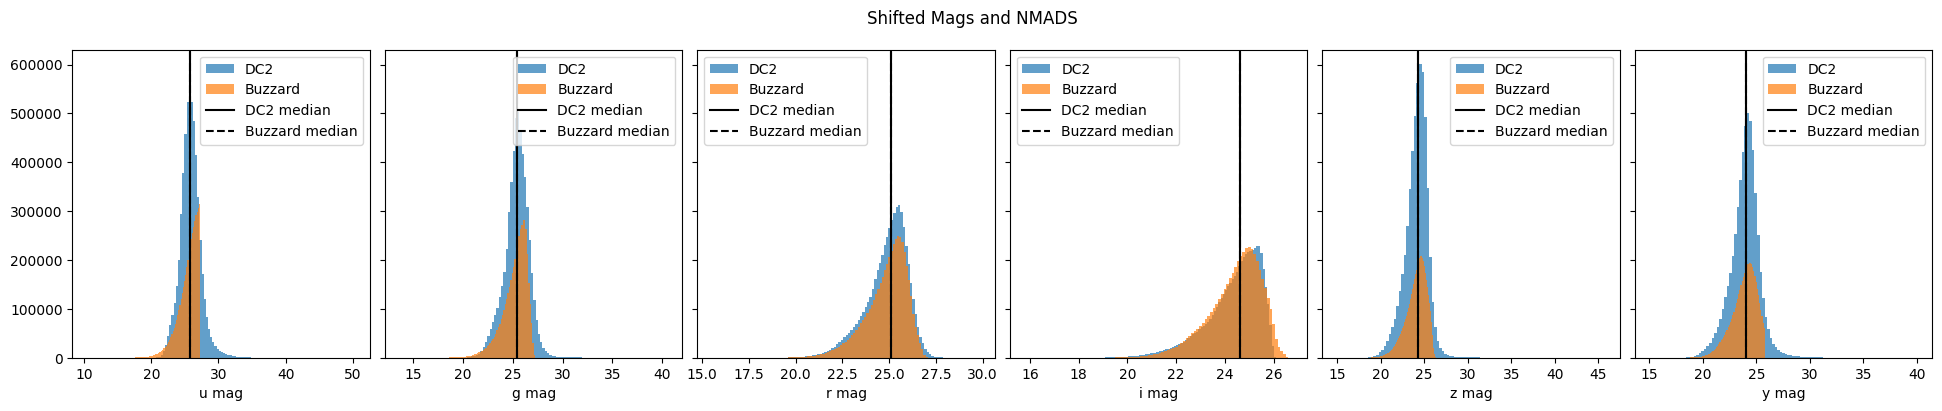

In [14]:
bands = ['u', 'g', 'r', 'i', 'z', 'y']

plt.figure()
fig, ax = plt.subplots(1, 6, sharey=True, figsize=(24,4))

for i in range(len(bands)):
    band_name = bands[i]
    band_dc2 = dc2_df[band_name].to_numpy()
    dc2_med = np.median(band_dc2)
    band_buz = new_mags_dict[band_name]
    buz_med = np.median(band_buz)

    ax[i].hist(band_dc2, bins=100, alpha=0.7, label='DC2')
    ax[i].hist(band_buz, bins=100, alpha=0.7, label='Buzzard')
    ax[i].axvline(x=dc2_med, color='k', label='DC2 median')
    ax[i].axvline(x=buz_med, color='k', linestyle='--', label='Buzzard median')
    ax[i].set_xlabel(f'{bands[i]} mag')
    ax[i].legend()

fig.subplots_adjust(wspace=0.05)

plt.suptitle('Shifted Mags and NMADS')
plt.show()

<Figure size 640x480 with 0 Axes>

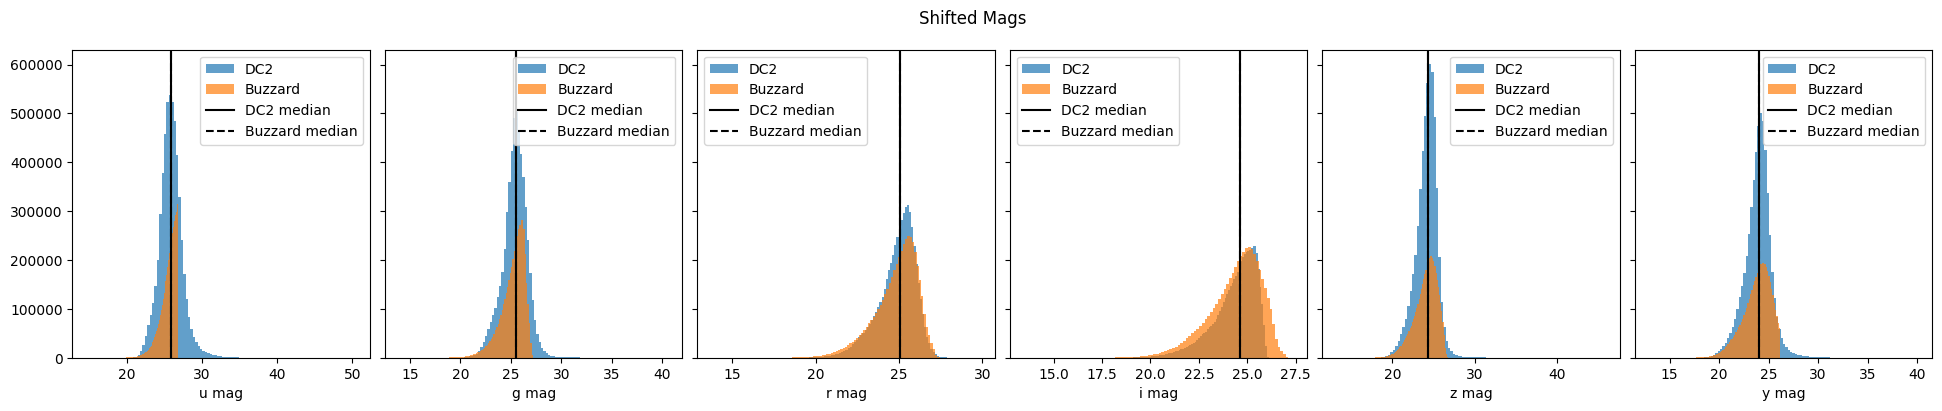

In [15]:
bands = ['u', 'g', 'r', 'i', 'z', 'y']

plt.figure()
fig, ax = plt.subplots(1, 6, sharey=True, figsize=(24,4))

for i in range(len(bands)):
    band_name = bands[i]
    band_dc2 = dc2_df[band_name].to_numpy()
    dc2_med = np.median(band_dc2)
    band_buz = buzzard_df[band_name]
    buz_med = np.median(band_buz)

    ax[i].hist(band_dc2, bins=100, alpha=0.7, label='DC2')
    ax[i].hist(band_buz, bins=100, alpha=0.7, label='Buzzard')
    ax[i].axvline(x=dc2_med, color='k', label='DC2 median')
    ax[i].axvline(x=buz_med, color='k', linestyle='--', label='Buzzard median')
    ax[i].set_xlabel(f'{bands[i]} mag')
    ax[i].legend()

fig.subplots_adjust(wspace=0.05)

plt.suptitle('Shifted Mags')
plt.show()

## Calculate colors

In [16]:
bands = ['u', 'g', 'r', 'i', 'z', 'y']

for i in range(len(bands)-1):
    color = new_mags_dict[bands[i]] - new_mags_dict[bands[i+1]]
    color_name = bands[i] + bands[i+1]
    new_mags_dict[color_name] = color

<Figure size 640x480 with 0 Axes>

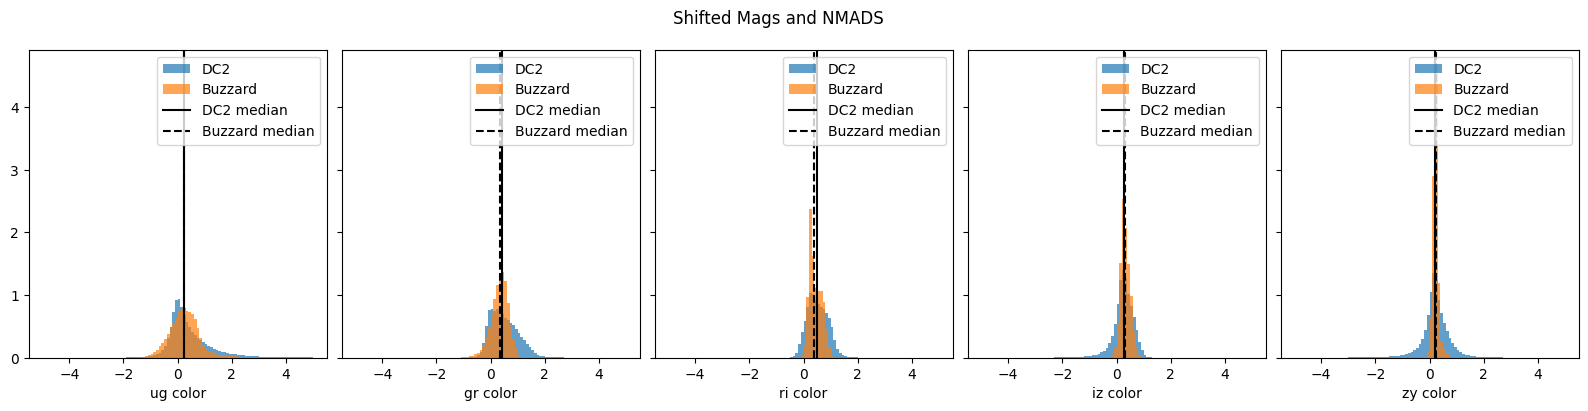

In [18]:
colors = ['ug', 'gr', 'ri', 'iz', 'zy']

plt.figure()
fig, ax = plt.subplots(1, 5, sharey=True, figsize=(20,4))

for i in range(len(colors)):
    color_name = colors[i]
    color_dc2 = dc2_df[color_name].to_numpy()
    dc2_med = np.median(color_dc2)
    color_buz = new_mags_dict[color_name]
    buz_med = np.median(color_buz)

    ax[i].hist(color_dc2, bins=100, range=[-5,5], alpha=0.7, density=True, label='DC2')
    ax[i].hist(color_buz, bins=100, range=[-5,5], alpha=0.7, density=True, label='Buzzard')
    ax[i].axvline(x=dc2_med, color='k', label='DC2 median')
    ax[i].axvline(x=buz_med, color='k', linestyle='--', label='Buzzard median')
    ax[i].set_xlabel(f'{colors[i]} color')
    ax[i].legend()

fig.subplots_adjust(wspace=0.05)
plt.suptitle('Shifted Mags and NMADS')
plt.show()

<Figure size 640x480 with 0 Axes>

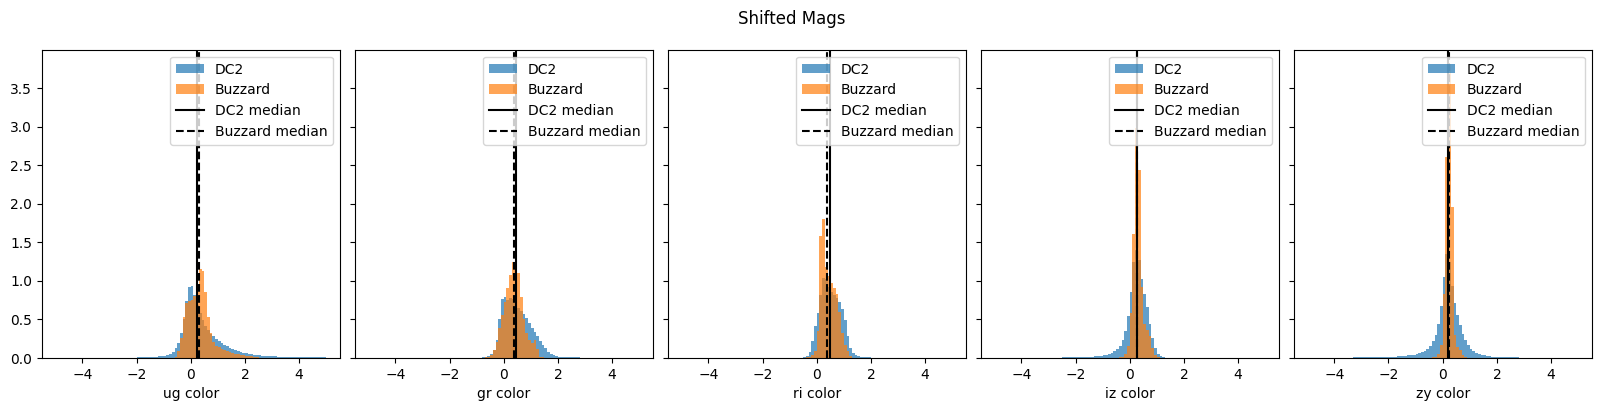

In [19]:
colors = ['ug', 'gr', 'ri', 'iz', 'zy']

plt.figure()
fig, ax = plt.subplots(1, 5, sharey=True, figsize=(20,4))

for i in range(len(colors)):
    color_name = colors[i]
    color_dc2 = dc2_df[color_name].to_numpy()
    dc2_med = np.median(color_dc2)
    color_buz = buzzard_df[color_name]
    buz_med = np.median(color_buz)

    ax[i].hist(color_dc2, bins=100, range=[-5,5], alpha=0.7, density=True, label='DC2')
    ax[i].hist(color_buz, bins=100, range=[-5,5], alpha=0.7, density=True, label='Buzzard')
    ax[i].axvline(x=dc2_med, color='k', label='DC2 median')
    ax[i].axvline(x=buz_med, color='k', linestyle='--', label='Buzzard median')
    ax[i].set_xlabel(f'{colors[i]} color')
    ax[i].legend()

fig.subplots_adjust(wspace=0.05)
plt.suptitle('Shifted Mags')
plt.show()

## Make New DataFrame

In [20]:
new_buz_df = pd.DataFrame.from_dict(new_mags_dict)
new_buz_df

,u,g,r,i,z,y,ug,gr,ri,iz,zy
0,24.834800,24.738563,24.358604,23.654883,23.251248,22.993570,0.096237,0.379959,0.703720,0.403635,0.257678
1,25.893563,26.033163,25.824598,25.174591,24.785597,24.537173,-0.139600,0.208565,0.650007,0.388994,0.248424
2,24.739183,23.192646,22.544167,22.011115,21.424293,21.244520,1.546537,0.648478,0.533052,0.586822,0.179773
3,23.688912,24.212749,24.104614,23.536228,23.152091,22.901629,-0.523837,0.108135,0.568387,0.384137,0.250462
4,23.692127,23.742919,23.427837,23.078853,22.683791,22.458741,-0.050792,0.315081,0.348985,0.395062,0.225049
...,...,...,...,...,...,...,...,...,...,...,...
4735951,26.086591,25.530880,24.866679,24.497109,24.184881,23.862295,0.555711,0.664201,0.369570,0.312228,0.322586
4735952,23.240075,22.883641,23.030727,22.797613,22.409054,22.255641,0.356434,-0.147086,0.233114,0.388559,0.153413
4735953,24.705451,25.304756,25.161762,24.435404,23.935535,23.727287,-0.599305,0.142994,0.726357,0.499870,0.208248
4735954,25.215625,25.099269,24.649916,24.403210,24.158504,23.866784,0.116355,0.449353,0.246706,0.244706,0.291719


In [21]:
new_buz_df['specz'] = buzzard_df['specz']

In [22]:
bands = ['u', 'g', 'r', 'i', 'z', 'y']
colors = ['ug', 'gr', 'ri', 'iz', 'zy']

for band in bands:
    new_buz_df[f'e{band}'] = buzzard_df[f'e{band}']

for color in colors:
    new_buz_df[f'e{color}'] = buzzard_df[f'e{color}']

In [23]:
new_buz_df

,u,g,r,i,z,y,ug,gr,ri,iz,...,eg,er,ei,ez,ey,eug,egr,eri,eiz,ezy
0,24.834800,24.738563,24.358604,23.654883,23.251248,22.993570,0.096237,0.379959,0.703720,0.403635,...,0.011773,0.007572,0.004830,0.006345,0.011582,0.055823,0.013997,0.008981,0.007974,0.013206
1,25.893563,26.033163,25.824598,25.174591,24.785597,24.537173,-0.139600,0.208565,0.650007,0.388994,...,0.037506,0.037349,0.028096,0.033604,0.065846,0.116849,0.052931,0.046737,0.043802,0.073925
2,24.739183,23.192646,22.544167,22.011115,21.424293,21.244520,1.546537,0.648478,0.533052,0.586822,...,0.002951,0.001050,0.000719,0.000872,0.001616,0.051277,0.003132,0.001273,0.001130,0.001836
3,23.688912,24.212749,24.104614,23.536228,23.152091,22.901629,-0.523837,0.108135,0.568387,0.384137,...,0.007353,0.005743,0.004210,0.005697,0.010443,0.026429,0.009330,0.007120,0.007083,0.011895
4,23.692127,23.742919,23.427837,23.078853,22.683791,22.458741,-0.050792,0.315081,0.348985,0.395062,...,0.004829,0.002749,0.002478,0.003425,0.006342,0.025895,0.005557,0.003701,0.004227,0.007208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4735951,26.086591,25.530880,24.866679,24.497109,24.184881,23.862295,0.555711,0.664201,0.369570,0.312228,...,0.023925,0.013164,0.012816,0.017496,0.030799,0.128146,0.027308,0.018372,0.021688,0.035422
4735952,23.240075,22.883641,23.030727,22.797613,22.409054,22.255641,0.356434,-0.147086,0.233114,0.388559,...,0.002238,0.001784,0.001789,0.002541,0.005046,0.018944,0.002862,0.002526,0.003108,0.005650
4735953,24.705451,25.304756,25.161762,24.435404,23.935535,23.727287,-0.599305,0.142994,0.726357,0.499870,...,0.019542,0.018151,0.011932,0.013344,0.026456,0.053731,0.026671,0.021722,0.017901,0.029631
4735954,25.215625,25.099269,24.649916,24.403210,24.158504,23.866784,0.116355,0.449353,0.246706,0.244706,...,0.016259,0.010397,0.011495,0.017002,0.030955,0.072224,0.019299,0.015499,0.020523,0.035317


## Save File

In [24]:
filename = 'augmentation_paper_plots/catalogs/buzzard_shifted_mags_and_nmads.hdf5'
outf = h5py.File(filename, 'w')
group = outf.create_group('photometry')

In [25]:
keys = list(new_buz_df.columns)
for key in keys:
    group[f'{key}'] = new_buz_df[f'{key}']
outf.close()